In [10]:
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
import pandas as pd

In [6]:
df = pd.read_pickle('apdft.pkl')
df_rank = pd.read_pickle('apdft-ranked.pkl')

Text(0, 0.5, '% correctly assigned\n from APDFT')

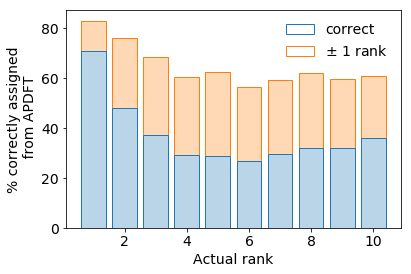

In [7]:
def find_correct_ones(real_position, max_deviation=0):
    total = df_rank.query('reference_rank == @real_position')
    match = total.query('abs(total_rank - reference_rank) <= @max_deviation')
    return len(match) / len(total)
plt.rc('font', size=14)
xs = range(1, 11)
base = np.zeros(len(xs))
labels = {0: 'correct', 1:r'$\pm$ 1 rank',2:r'$\pm$ 2 rank'}
for delta in (0, 1,):
    ys = [find_correct_ones(_, delta) for _ in xs]
    plt.bar(xs, np.array(ys)*100, bottom=base, zorder=-delta, color='white')
    plt.bar(xs, np.array(ys)*100, bottom=base, zorder=-delta, alpha=0.3, color='C%d' % delta)
    d = plt.bar(xs, np.array(ys)*100, bottom=base, zorder=-delta, label=labels[delta], edgecolor='C%d' % delta, color='none')
plt.legend(frameon=False)
plt.xlabel('Actual rank')
plt.ylabel('% correctly assigned\n from APDFT')

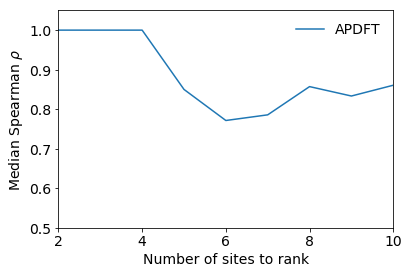

In [11]:
counts = {}
for name, group in df_rank.groupby('molid'):
    count = len(group)
    rank = sts.spearmanr(group.total_rank, group.reference_rank)
    if count not in counts:
        counts[count] = []
    counts[count].append(rank[0])
xs = []
ys = []
for nhydrogens in sorted(counts.keys()):
    xs.append(nhydrogens)
    ys.append(np.median(counts[nhydrogens]))
plt.plot(xs, ys, label='APDFT')
plt.xlim(2, 10)
plt.ylim(0.5, 1.05)
plt.xlabel('Number of sites to rank')
plt.ylabel(r'Median Spearman $\rho$')
plt.legend(frameon=False)